## Exploration of text similarity using a review dataset, to measure similarity between textual data

In [253]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### 1. Text Preprocessing

#### Read the dataset from the given CSV file into a pandas DataFrame.

In [254]:
df = pd.read_csv('MovieReview.csv')
df.head(3)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0


#### Perform text preprocessing tasks such as tokenization, removing stopwords, and stemming or lemmatization on the review text column.

##### Tokenization

In [255]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

##### Removing stopwords

In [256]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

##### Stemming

In [257]:
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

##### Lemmatization

In [258]:
import re
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in lemmatized_tokens if token.isalpha()]
    return cleaned_tokens

In [259]:
df.head(3)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0


In [260]:
df['text'] = df['text'].apply(tokenize_text)

In [261]:
df['text'] = df['text'].apply(remove_stopwords)

In [262]:
df['text'] = df['text'].apply(stem_tokens)

In [263]:
df['text']  = df['text'].apply(lemmatize_tokens)

#### Display the preprocessed text for a few reviews to observe the changes.

In [264]:
df['text'].head(8)

0    [alway, wrote, seri, complet, jim, belushi, in...
1    [watch, purcel, typic, mari, kate, ashley, far...
2    [movi, poorli, written, direct, fell, asleep, ...
3    [interest, thing, miryang, secret, sunshin, ac...
4    [first, read, berlin, meer, expect, much, thou...
5    [saw, film, septemb, indianapoli, one, judg, h...
6    [saw, screen, movi, last, night, high, expect,...
7    [william, hurt, may, american, matine, idol, a...
Name: text, dtype: object

#### Plot the frequency of the most common 50 words in the dataset using a word cloud.

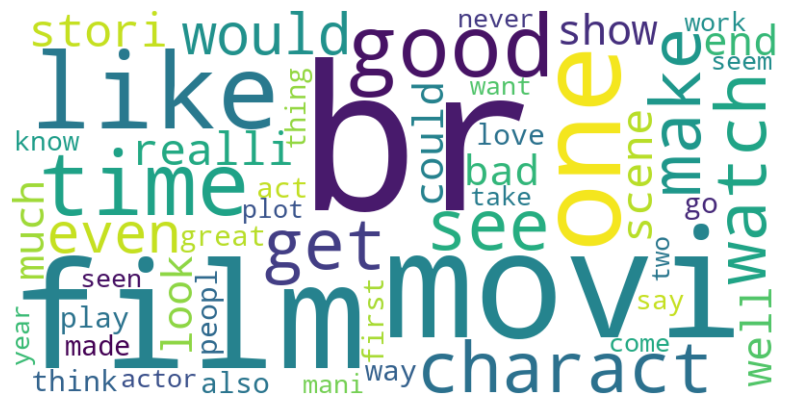

In [265]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_tokens = []
for tokens_list in df['text']:
    all_tokens.extend(tokens_list)
# Calculate the frequency of each token
token_freq = nltk.FreqDist(all_tokens)
# Get the most common 50 tokens
most_common_tokens = token_freq.most_common(50)

wordcloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(dict(most_common_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Text Similarity

#### Create Text1 file with the first 20 reviews and Text2 file with the next 20 reviews from the given dataset.Apply all text preprocessing like tokenization, removing stopwords, and stemming or lemmatization

In [269]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
Text1 = " ".join(df['text'][:20])
Text2 = " ".join(df['text'][20:40])
# Convert 'text' column to sets
df['text'] = df['text'].apply(lambda x: set(x.split()))

# Convert Text1 and Text2 to sets
set1 = set(Text1.split())
set2 = set(Text2.split())


In [270]:
Text1

'made campbel object cage even tragic experienti noth local littl broad countri hairi star larri wrote beat reason pull jim seri howl tri couch bacon copi realli sox tight right heavili altern anoth involv complet everi job room could somehow alway station invent real gasolin elicit rememb joe butt white wonder flavor show flamethrow slightli hell absolut andi gold courtney one like nobel win attract pan base state realiz side comed woman america look smack buffooneri watch actor improv guy everyth fri channel across comic end turn deliveri stop floor occur opinion without tv whatsoev zero would mutt ling run game day chest vacant charact physic funni make foghorn lighthous total greatest style br design store blanket wart prize well get episod except belushi viewer head happenst walk said take decid send fate consist nut gener year straw gotten good someon sweep back remot sti asid evid way judgment hang feel whatev play made design definetli till fire tire boy kiss get even episod sp

In [271]:
Text2

'clear matter job actress give well two perspect life togeth strongli captur definit magnific work fact comedi young jone see cleverli sen posit nia realist alreadi mood would portray movi seen hope larenz love romant woman realli fine compar great tate feel men long actor anoth recommend made scene everyth br bad act buy could spent two even eat kick clich entertain older fail lousi someth comedi wood honestli wors annoy friend cring usual stori mind terribl year routin consid believ meet rent good effect creepi leg go nuditi wast drag film certainli realli ago halloween son cours ha retard witch know el make cabl watch gore thing construct minim time complet heck cannib script want worth well v lot much nottingham work comedi cari tee sheriff usual elw robin rent like good part evil still film think sort humor hood cours funni night stuff face play want sing fall give even sung felt next swoon blue hear name movi like one ol someon love day adelaid make feel daughter butterfli eye bu

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#### Apply the cosine similarity function to calculate the similarity between Text1 and Text2. Display the similarity scores

In [273]:
vectorizer = CountVectorizer().fit_transform([Text1, Text2])
cosine_sim = cosine_similarity(vectorizer)

print("Cosine Similarity between Text1 and Text2:")
print(cosine_sim[0][1])


Cosine Similarity between Text1 and Text2:
0.6624435644774187


#### Apply the Jaccard similarity function to calculate the similarity between pairs of reviews in the dataset.

In [274]:
def jaccard_similarity(set1,set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [276]:
similarity_score = jaccard_similarity(set1=set1,set2=set2)
print(f"Jaccard Similarity :{similarity_score}")

Jaccard Similarity :0.23003033367037412


#### Visualize the similarity scores using any plot such as bar plots, heatmaps, or scatter plots

In [278]:
similarity_df = pd.DataFrame({
    'Similarity Method': ['Cosine Similarity', 'Jaccard Similarity'],
    'Similarity Score': [cosine_sim[0][1], similarity_score]
})

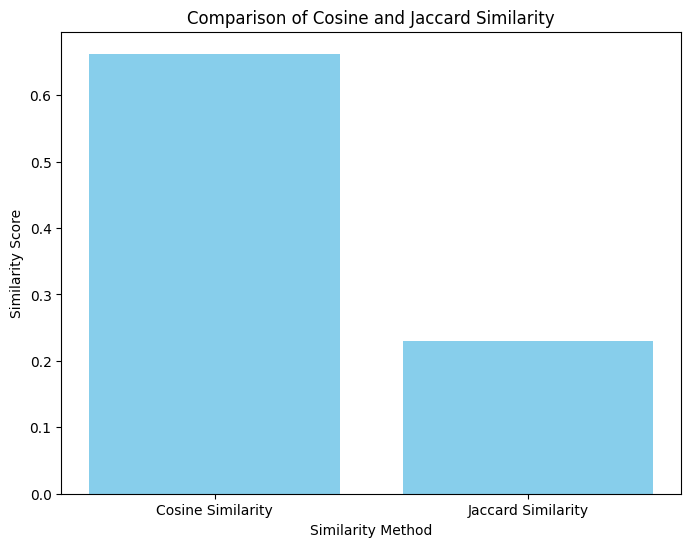

In [279]:
plt.figure(figsize=(8, 6))
plt.bar(similarity_df['Similarity Method'], similarity_df['Similarity Score'], color='skyblue')
plt.xlabel('Similarity Method')
plt.ylabel('Similarity Score')
plt.title('Comparison of Cosine and Jaccard Similarity')
plt.show()